# **Malignant tissue detection for Breast Cancer**

### Objective

Classify the Wisconsin Diagnostic Breast Cancer(WDBC) dataset using decision trees. Estimate the misclassification rates of both classes and populate the 2x2 confusion matrix.

Let us start by importing all necessary python modules.

In [2]:
import numpy as np 
import scipy as sp
from sklearn import tree # For decision trees
from sklearn import model_selection # For splitting our dataset
import sklearn.metrics as skm # For calculating metrics
import seaborn as sn # For creating plots
import pandas as pd # For handling and processing of datasets
import graphviz # For plotting trees
import matplotlib.pyplot as plt # For creating plots

# For enabling multiple outputs per Jupyter cell
from IPython.core.interactiveshell import InteractiveShell 

InteractiveShell.ast_node_interactivity = "all"

### Part 1

I start by importing our datasets into my program.  I have created a list of headers for more legibility and descriptiveness.

In [3]:
header = ['Radius Mean', 'Texture Mean', 'Perimeter Mean', 'Area Mean', 'Smoothness Mean', 'Compactness Mean', 
          'Concavity Mean', 'No. of concave portions Mean', 'Symmetry Mean', 'Fractal dimension Mean', 'Radius SD', 
          'Texture SD', 'Perimeter SD', 'Area SD', 'Smoothness SD', 'Compactness SD', 'Concavity SD', 
          'No. of concave portions SD', 'Symmetry SD', 'Fractal dimension SD', 'Radius Max', 'Texture Max', 
          'Perimeter Max', 'Area Max', 'Smoothness Max', 'Compactness Max', 'Concavity Max', 
          'No. of concave portions Max', 'Symmetry Max', 'Fractal dimension Max']

# Read the training dataset and labels into Pandas dataframes
trainX = pd.read_csv("/home/sarvesh/Desktop/Assignment 2/P1_data/trainX.csv", header = None, names = header)
trainY = pd.read_csv("/home/sarvesh/Desktop/Assignment 2/P1_data/trainY.csv", header = None, names = ['Label'])

# Read the testing dataset and labels into Pandas dataframes
testX = pd.read_csv("/home/sarvesh/Desktop/Assignment 2/P1_data/testX.csv", header = None, names = header)
testY = pd.read_csv("/home/sarvesh/Desktop/Assignment 2/P1_data/testY.csv", header = None, names = ['Label'])

* To train a Decision Tree over my train data, I have used the _Scikit-Learn DecisionTreeClassifier_ class.  
* Out of the available two splitting criterias, gini and entropy, I have used _entropy_.
* The tree has been set to output the best possible split

In [4]:
classifier = tree.DecisionTreeClassifier(criterion = 'entropy', splitter = 'best')
classifier = classifier.fit(trainX, trainY)

I have used the _graphviz_ library to plot our tree. The tree is exported into _.dot_ data which is plotted using _graphviz_.

In [5]:
# The parameters have been set to make the tree plot more descriptive. 
data = tree.export_graphviz(classifier, out_file=None, feature_names=trainX.columns, 
                            class_names=['Benign', 'Malignant'],
                            filled=True, rounded=True, special_characters=True)

# Store the tree plot in graph
graph = graphviz.Source(data)  

    a) Plot of the Decision Tree: 

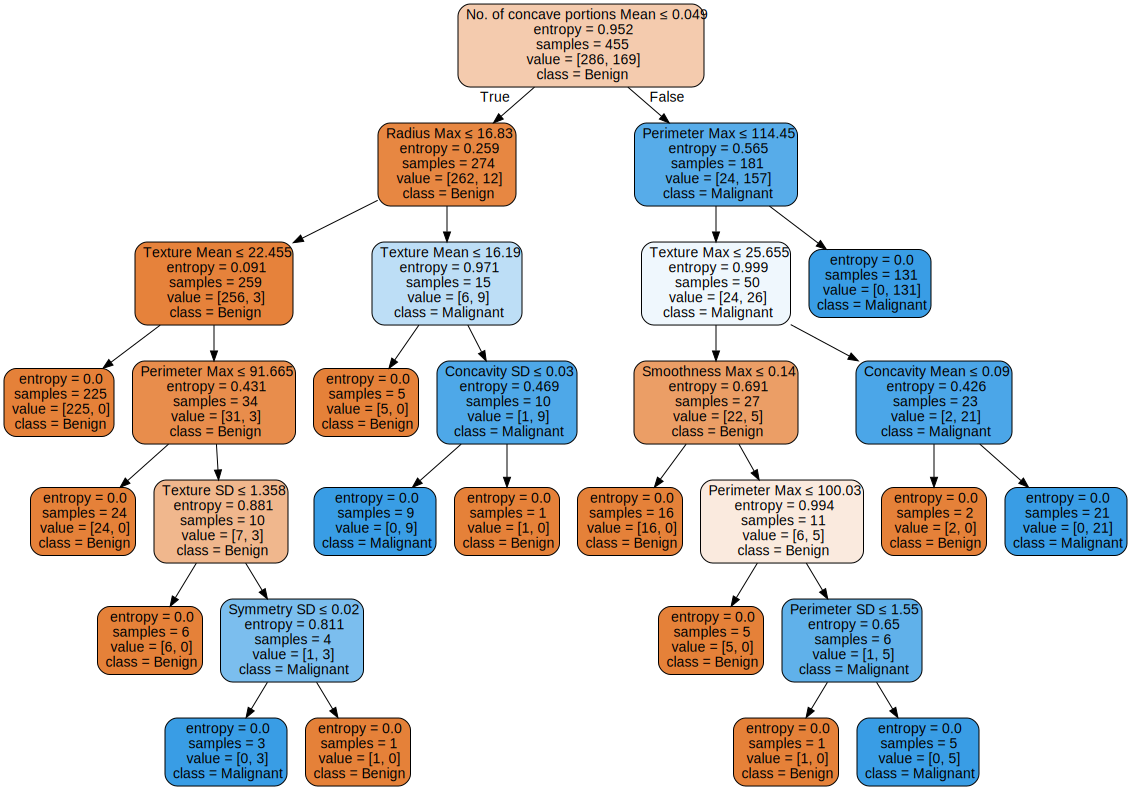

In [6]:
graph

    b) Total number of nodes:

The *tree_* class created by the _DecisionTreeClassifier_ contains the total nodes of the tree.  
This can be accessed as follows:

In [7]:
total_nodes = classifier.tree_.node_count
total_nodes

29

Hence our tree contains **29** total nodes.
    
    c) Total number of leaf nodes:
The leaf nodes have been manually counted and their count is **15**.

### Misclassification rates and Confusion matrix

The test data is run through the tree and the classes are predicted.

In [8]:
testPred = classifier.predict(testX)

I have used the Scikit Learn Metrics class *confusion_matrix* to populate the confusion matrix.  
The matrix is plotted using _seaborn_ library. The Y-axis contains the true values while the X-axis contains the predicted values.

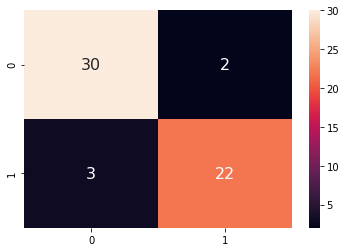

In [9]:
cnf_matrix = skm.confusion_matrix(testY, testPred)
plot_cnf_matrix = sn.heatmap(cnf_matrix, annot=True, annot_kws={"size": 16})

In [10]:
# Calculating the misclassification rates
misclass0 = cnf_matrix[0][1]/(cnf_matrix[0][0] + cnf_matrix[0][1])
misclass1 = cnf_matrix[1][0]/(cnf_matrix[1][0] + cnf_matrix[1][1])

print('The misclassification rate for class 0 will be:', misclass0*100)
print('The misclassification rate for class 1 will be:', misclass1*100)

The misclassification rate for class 0 will be: 6.25
The misclassification rate for class 1 will be: 12.0


As with the confusion matrix, the accuracy was calculated with the Scikit Learn Metrics module class *accuracy_score*.

In [11]:
accuracy = skm.accuracy_score(testY, testPred)
print("The accuracy of the Decision Tree is:", accuracy*100,"%")

The accuracy of the Decision Tree is: 91.22807017543859 %


### Additional experiments
    
Out of curiosity, lets train our binary decision tree with increasing sizes of training set, say 10%, 20%, ... 100% and test the trees with the test set. Hopefully we would get some interesting results.
    
To realize this goal, I have created a function which takes percentage of data to use as training data and returns training accuracy and testing accuracy

In [12]:
def trainClassifier(train_percentage):
    # Split the data.
    
    # trainSplitX is the data used to train the tree i.e. 10%, 20%, ... as specified in the question.
    # trainSplitY is the corresponding label of the trainSplitX data.
    
    # trainLeftX is the data used to calculate the training accuracy i.e. the training data NOT used to fit tree.
    # trainLeftY is the corresponding label of the trainLeftX data.
    trainSplitX, trainLeftX, trainSplitY, trainLeftY = model_selection.train_test_split(trainX, trainY, 
                                                                                        test_size = (1-train_percentage))
    
    # Create the Decision tree.
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', splitter = 'best')
    clf = clf.fit(trainSplitX, trainSplitY)
    
    # Predict the testing data and the training data left after the split is performed.
    test_pred = clf.predict(testX)
    trainLeft_pred = clf.predict(trainLeftX)
    
    # Calculate the two accuracies.
    accuracy_trainLeft = skm.accuracy_score(trainLeftY, trainLeft_pred)
    accuracy_test = skm.accuracy_score(testY, test_pred)
    
    return accuracy_trainLeft, accuracy_test

Now we run the function to get the accuracies for varying percentage of training data.  
The loop runs and returns the accuracies for training data sizes from 10% to 90%.  

Note: the above problem has already been solved for 100% training data in **Part 1**

In [13]:
# Create two empty arrays to store the accuracy values.
accuracy_train = [None]*9
accuracy_test = [None]*9

# Run the function for increasing size of training data.
for i in range(1,10):
    accuracy_train[i-1], accuracy_test[i-1] = trainClassifier(i/10)

The next cell plots a line plot showing how training and test accuracies vary with number of training samples.

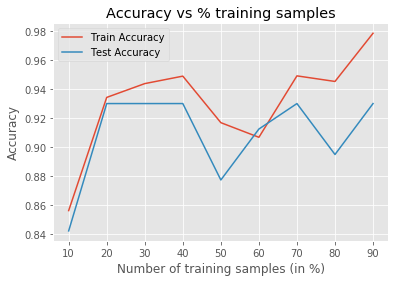

In [14]:
trainPercent = list(range(10, 100, 10))

# Set the style of the graph.
plt.style.use('ggplot')

# Set the title and labels.
title = plt.title("Accuracy vs % training samples")
xLabel = plt.xlabel("Number of training samples (in %)")
yLabel = plt.ylabel("Accuracy")

# Plot the two graphs: Training accuracy and testing accuracy, both vs Number of training samples
p1 = plt.plot(trainPercent, accuracy_train, label='Train Accuracy')
p2 = plt.plot(trainPercent, accuracy_test, label='Test Accuracy')

# Show the legend
legend = plt.legend()

### Conclusions:

* As we can see from the last graph, the training as well as the testing accuracies increase with increasing number of training samples.
* This can be more concretely verified by running the _trainClassifier_ function many times for each size of training data and averaging the accuracy for each split percentage.
* The tree did a fair job at classifying the test data with an accuracy of close to 93%. 
* We could try some variations in the tree parameter, like changing the criteria of split for a better measure of the performance.